In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

In [2]:
# Reading from file and creating a dataframe for Manhattan

airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()

airbnb_df['min_price_to_stay'] = airbnb_df['price'] * airbnb_df['minimum_nights']

airbnb_df = airbnb_df[['host_id', 'id', 'neighbourhood_group','neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]

manhattan_airbnb_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']
manhattan_airbnb_df.head()

manhattan_airbnb_df


,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
2,4632,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,1,365
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0
5,7322,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,0.59,1,129
7,8967,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,274311461,36483010,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,1200,0,NaN,1,176
48888,274321313,36484087,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,500,0,NaN,1,31
48892,23492952,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1150,0,NaN,1,27
48893,30985759,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,55,0,NaN,6,2


last_review and reviews_per_month are missing values compared to the rest of the data
likely due to listings have zero reviews...

In [4]:
# Counting to see the missing values

manhattan_airbnb_df.count()

host_id                           21661
id                                21661
neighbourhood_group               21661
neighbourhood                     21661
latitude                          21661
longitude                         21661
room_type                         21661
price                             21661
minimum_nights                    21661
min_price_to_stay                 21661
number_of_reviews                 21661
reviews_per_month                 16632
calculated_host_listings_count    21661
availability_365                  21661
dtype: int64

In [5]:
# Filling empty reviews per month values with zero

manhattan_airbnb_df['reviews_per_month'].fillna(0)
manhattan_airbnb_df.count()

host_id                           21661
id                                21661
neighbourhood_group               21661
neighbourhood                     21661
latitude                          21661
longitude                         21661
room_type                         21661
price                             21661
minimum_nights                    21661
min_price_to_stay                 21661
number_of_reviews                 21661
reviews_per_month                 16632
calculated_host_listings_count    21661
availability_365                  21661
dtype: int64

In [6]:
# Calculating outliers for minimum nights to stay and prices

min_nights_manhattan_quartiles = manhattan_airbnb_df['minimum_nights'].quantile([.25,.5,.75])
min_nights_lowerq = min_nights_manhattan_quartiles[.25]
min_nights_upperq = min_nights_manhattan_quartiles[.75]
min_nights_iqr = (min_nights_upperq-min_nights_lowerq).round(2)
min_nights_low_b = (min_nights_lowerq - (1.5*min_nights_iqr)).round(2)
print(f'lower bound for minimum nights is {min_nights_low_b}')
min_nights_up_b = (min_nights_upperq + (1.5*min_nights_iqr)).round(2)
print(f'upper bound for minimum nights is {min_nights_up_b}')

price_manhattan_quartiles = manhattan_airbnb_df['price'].quantile([.25,.5,.75])
price_lowerq = price_manhattan_quartiles[.25]
price_upperq = price_manhattan_quartiles[.75]
price_iqr = (price_upperq-price_lowerq).round(2)
price_low_b = (price_lowerq - (1.5*price_iqr)).round(2)
print(f'lower bound for price is {price_low_b}')
price_up_b = (price_upperq + (1.5*price_iqr)).round(2)
print(f'upper bound for price is {price_up_b}')

lower bound for minimum nights is -6.5
upper bound for minimum nights is 13.5
lower bound for price is -92.5
upper bound for price is 407.5


In [7]:
# Applying outliers to obtain only the useful data and get rid of the rest

manhattan_airbnb_df = manhattan_airbnb_df.loc[(manhattan_airbnb_df['price'] <= 407.5) & (manhattan_airbnb_df['minimum_nights'] <= 13.5) & (manhattan_airbnb_df['number_of_reviews'] > 0)]
manhattan_airbnb_df

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0
5,7322,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,0.59,1,129
7,8967,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,3.47,1,220
8,7490,5203,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,158,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48576,52917571,36318560,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,240,1,1.00,1,7
48601,269870940,36335990,Manhattan,Financial District,40.70603,-74.01084,Entire home/apt,75,1,75,1,1.00,1,181
48634,273361532,36351128,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110,3,330,2,2.00,1,15
48732,33917435,36411407,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,600,1,1.00,1,13


In [8]:
# Creating bins for prices

price_bins = [0,49.9,99.9,149.9,249.9,399.9,10001]
price_bin_names = ['0-49','50-99','100-149','150-249','250-399','>400']
manhattan_airbnb_df = manhattan_airbnb_df.loc[:,['neighbourhood','room_type','number_of_reviews','minimum_nights','price','min_price_to_stay']]
manhattan_airbnb_df['price range'] = pd.cut(manhattan_airbnb_df['price'],price_bins,labels=price_bin_names)

# Using the bins to create groups of neighbourhood, room type and price range.
neighbourhood_by_count = manhattan_airbnb_df[['neighbourhood', 'room_type', 'price range','number_of_reviews','minimum_nights','min_price_to_stay']].groupby(['neighbourhood', 'room_type', 'price range']).agg(['count', 'mean', 'min', 'max'])
neighbourhood_by_count = neighbourhood_by_count.sort_values(by=('number_of_reviews', 'count'), ascending=False)

neighbourhood_by_count.head(25)

number_of_reviews             \
                                                           count       mean   
neighbourhood      room_type       price range                                
Harlem             Private room    50-99                     842  38.019002   
East Village       Entire home/apt 150-249                   413  29.736077   
Upper East Side    Entire home/apt 150-249                   340  26.770588   
Hell's Kitchen     Entire home/apt 150-249                   339  30.185841   
Upper West Side    Entire home/apt 150-249                   329  23.465046   
East Harlem        Private room    50-99                     322  48.304348   
Washington Heights Private room    50-99                     300  32.143333   
Harlem             Entire home/apt 100-149                   280  38.771429   
Upper West Side    Private room    50-99                     260  32.880769   
Harlem             Entire home/apt 150-249                   259  40.544402   
East Village       Private room    50-99                     258  35.755814   
Upper East Side    Entire home/apt 100-149                   247  21.902834   
Chelsea            Entire home/apt 150-249                   247  28.963563   
West Village       Entire home/apt 150-249                   238  26.550420   
Hell's Kitchen     Private room    100-149                   211  54.047393   
Midtown            Entire home/apt 150-249                   207  24.990338   
East Village       Entire home/apt 100-149                   202  26.801980   
Financial District Entire home/apt 150-249                   197  11.857868   
Hell's Kitchen     Entire home/apt 250-399                   188  28.228723   
Lower East Side    Entire home/apt 150-249                   187  37.406417   
Hell's Kitchen     Private room    50-99                     183  49.666667   
East Village       Private room    100-149                   177  32.564972   
Upper East Side    Private room    50-99                     174  34.275862   
Lower East Side    Private room    50-99                     170  37.852941   
East Village       Entire home/apt 250-399                   168  29.101190   

                                                           minimum_nights  \
                                                min    max          count   
neighbourhood      room_type       price range                              
Harlem             Private room    50-99        1.0  458.0            842   
East Village       Entire home/apt 150-249      1.0  403.0            413   
Upper East Side    Entire home/apt 150-249      1.0  314.0            340   
Hell's Kitchen     Entire home/apt 150-249      1.0  276.0            339   
Upper West Side    Entire home/apt 150-249      1.0  401.0            329   
East Harlem        Private room    50-99        1.0  325.0            322   
Washington Heights Private room    50-99        1.0  307.0            300   
Harlem             Entire home/apt 100-149      1.0  322.0            280   
Upper West Side    Private room    50-99        1.0  353.0            260   
Harlem             Entire home/apt 150-249      1.0  287.0            259   
East Village       Private room    50-99        1.0  451.0            258   
Upper East Side    Entire home/apt 100-149      1.0  226.0            247   
Chelsea            Entire home/apt 150-249      1.0  252.0            247   
West Village       Entire home/apt 150-249      1.0  272.0            238   
Hell's Kitchen     Private room    100-149      1.0  394.0            211   
Midtown            Entire home/apt 150-249      1.0  202.0            207   
East Village       Entire home/apt 100-149      1.0  388.0            202   
Financial District Entire home/apt 150-249      1.0  152.0            197   
Hell's Kitchen     Entire home/apt 250-399      1.0  287.0            188   
Lower East Side    Entire home/apt 150-249      1.0  286.0            187   
Hell's Kitchen     Private room    50-99        1.0  430.0     

In [9]:
# Calculating popularity for top 25 items that have the highest numbers of listing counts

manhattan_neighbourhood_by_popularity = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in manhattan_neighbourhood_by_popularity:
        manhattan_neighbourhood_by_popularity.append(row[0])

manhattan_neighbourhood_listing_count = []

# Calculating the total number of listing counts for each neighbourhood that are in top25
for n in manhattan_neighbourhood_by_popularity:
    count = len(manhattan_airbnb_df.loc[manhattan_airbnb_df['neighbourhood'] == n])
    manhattan_neighbourhood_listing_count.append(count)

listing_count_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': manhattan_neighbourhood_by_popularity,
    'count': manhattan_neighbourhood_listing_count
})

# Creating a chart of neighbourhood by listing count

listing_count_by_neighbourhood_df = listing_count_by_neighbourhood_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhood_df

,neighbourhood,count
0,Harlem,1981
1,East Village,1333
3,Hell's Kitchen,1258
4,Upper West Side,1174
2,Upper East Side,1083
5,East Harlem,868
9,Midtown,699
6,Washington Heights,663
7,Chelsea,661
11,Lower East Side,646


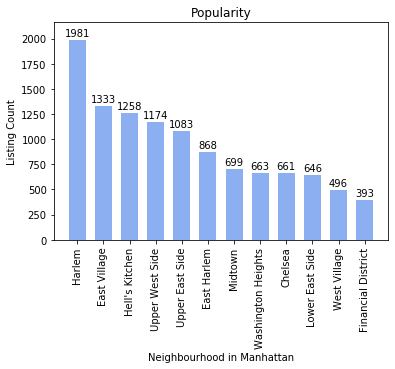

In [10]:
# Generating a bar graph
fig, ax = plt.subplots()

x_axis = np.arange(len(manhattan_neighbourhood_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhood_df['count']


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Manhattan')
ax.set_ylim(0,max(manhattan_neighbourhood_listing_count)+180)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

In [11]:
# Calculating worth per stay for each neighbourhood based on mean of min nights of stay and room type
neighbourhood_by_price = neighbourhood_by_count.head(25)

neighbourhood_by_price = neighbourhood_by_price.reset_index()

neighbourhood_by_price['worth_per_stay'] = neighbourhood_by_price[('min_price_to_stay', 'mean')] 

worth_per_stay = []

for i in range(len(neighbourhood_by_price)):
    if neighbourhood_by_price['room_type'][i] == 'Private room':
        # if it the listing is a private room, we will assume that there are two rooms available to list
        worth_per_stay.append(neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')][i]*2)
    else:
        worth_per_stay.append(neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')][i])

neighbourhood_by_price['worth_per_stay'] = worth_per_stay
    
neighbourhood_by_price = neighbourhood_by_price.sort_values(by='worth_per_stay', ascending=False)

neighbourhood_by_price



neighbourhood        room_type price range number_of_reviews  \
                                                                count   
24        East Village  Entire home/apt     250-399               168   
18      Hell's Kitchen  Entire home/apt     250-399               188   
13        West Village  Entire home/apt     150-249               238   
12             Chelsea  Entire home/apt     150-249               247   
4      Upper West Side  Entire home/apt     150-249               329   
21        East Village     Private room     100-149               177   
3       Hell's Kitchen  Entire home/apt     150-249               339   
1         East Village  Entire home/apt     150-249               413   
15             Midtown  Entire home/apt     150-249               207   
14      Hell's Kitchen     Private room     100-149               211   
2      Upper East Side  Entire home/apt     150-249               340   
19     Lower East Side  Entire home/apt     150-249               187   
9               Harlem  Entire home/apt     150-249               259   
17  Financial District  Entire home/apt     150-249               197   
20      Hell's Kitchen     Private room       50-99               183   
10        East Village     Private room       50-99               258   
23     Lower East Side     Private room       50-99               170   
22     Upper East Side     Private room       50-99               174   
16        East Village  Entire home/apt     100-149               202   
8      Upper West Side     Private room       50-99               260   
11     Upper East Side  Entire home/apt     100-149               247   
7               Harlem  Entire home/apt     100-149               280   
5          East Harlem     Private room       50-99               322   
0               Harlem     Private room       50-99               842   
6   Washington Heights     Private room       50-99               300   

                          minimum_nights                       \
         mean  min    max          count      mean  min   max   
24  29.101190  1.0  320.0            168  2.791667  1.0  10.0   
18  28.228723  1.0  287.0            188  2.680851  1.0   7.0   
13  26.550420  1.0  272.0            238  3.155462  1.0  10.0   
12  28.963563  1.0  252.0            247  3.117409  1.0  12.0   
4   23.465046  1.0  401.0            329  3.231003  1.0  13.0   
21  32.564972  1.0  414.0            177  2.564972  1.0  10.0   
3   30.185841  1.0  276.0            339  3.091445  1.0  12.0   
1   29.736077  1.0  403.0            413  3.055690  1.0  12.0   
15  24.990338  1.0  202.0            207  2.874396  1.0  12.0   
14  54.047393  1.0  394.0            211  2.284360  1.0  12.0   
2   26.770588  1.0  314.0            340  2.947059  1.0  10.0   
19  37.406417  1.0  286.0            187  2.780749  1.0  13.0   
9   40.544402  1.0  287.0            259  2.899614  1.0   7.0   
17  11.857868  1.0  152.0            197  2.380711  1.0  12.0   
20  49.666667  1.0  430.0            183  3.032787  1.0  12.0   
10  35.755814  1.0  451.0            258  2.868217  1.0  13.0   
23  37.852941  1.0  540.0            170  2.794118  1.0  10.0   
22  34.275862  1.0  389.0            174  2.678161  1.0  12.0   
16  26.801980  1.0  388.0            202  3.435644  1.0  12.0   
8   32.880769  1.0  353.0            260  2.557692  1.0  12.0   
11  21.902834  1.0  226.0            247  3.117409  1.0  12.0   
7   38.771429  1.0  322.0            280  3.042857  1.0  10.0   
5   48.304348  1.0  325.0            322  2.313665  1.0  13.0   
0   38.019002  1.0  458.0            842  2.441805  1.0  12.0   
6   32.143333  1.0  307.0            300  2.336667  1.0   9.0   

   min_price_to_stay                            worth_per_stay  
               count        mean    min     max                 
24               168  820.250000  250.0  3000.0     820.250000  
18               188  820.186170  250.0  2394.0     820.186170  
13               238 

In [12]:
# Generating a list of neighbourhood by worth per stay
manhattan_neighbourhood_by_worth = []


for neighbourhood in neighbourhood_by_price['neighbourhood']:
    if neighbourhood not in manhattan_neighbourhood_by_worth:
        manhattan_neighbourhood_by_worth.append(neighbourhood)


manhattan_neighbourhood_worth_per_stay = []


for n in manhattan_neighbourhood_by_worth:
    price = sum(neighbourhood_by_price.loc[neighbourhood_by_price['neighbourhood'] == n, 'worth_per_stay'])
    manhattan_neighbourhood_worth_per_stay.append(price)
    

worth_per_stay_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': manhattan_neighbourhood_by_worth,
    'Worth per Stay': manhattan_neighbourhood_worth_per_stay
})

worth_per_stay_by_neighbourhood_df = worth_per_stay_by_neighbourhood_df.sort_values(by='Worth per Stay', ascending=False)
worth_per_stay_by_neighbourhood_df



,neighbourhood,Worth per Stay
0,East Village,2865.364366
1,Hell's Kitchen,2446.161527
6,Upper East Side,1370.758038
8,Harlem,1226.494493
4,Upper West Side,995.458452
7,Lower East Side,966.960428
2,West Village,611.718487
3,Chelsea,599.919028
5,Midtown,553.579710
9,Financial District,496.223350


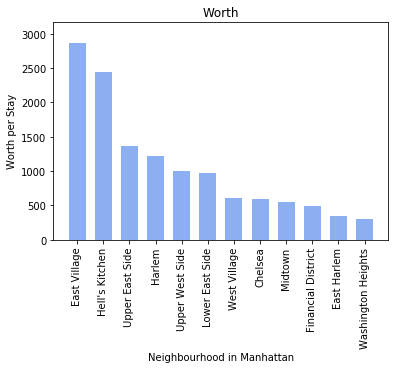

In [13]:
# Generating a bar graph
fig, ax = plt.subplots()

x_axis = np.arange(len(manhattan_neighbourhood_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhood_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Manhattan')
ax.set_ylim(0,max(manhattan_neighbourhood_worth_per_stay)+300)


# def autolabel(rects):
#     # Attach a text label above each bar in *rects*, displaying its height.
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 2),  
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)

plt.show()

Picking top 5 neighbourhoods for profitability calculation:

1. Upper West Side
2. Upper East Side
3. Hell's Kitchen
4. East Village
5. Harlem



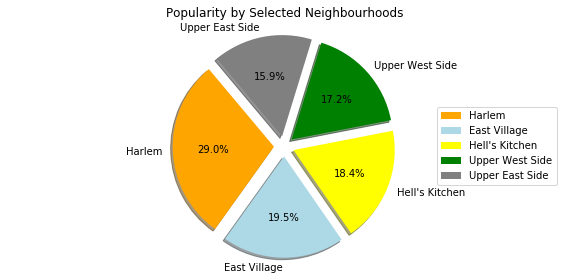

In [14]:
# Calulating popularity based the share of listing counts of top 5 selected neighbourhoods in Manhattan

pie_chart_df = listing_count_by_neighbourhood_df.reset_index(drop=True)

pie_chart_df

pie_chart_df = pie_chart_df.loc[0:4, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["orange","lightblue", "yellow", "green", "grey"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Popularity by Selected Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()

In [15]:
# Calculating profitability

profitability_df = worth_per_stay_by_neighbourhood_df.reset_index(drop=True)

profitability_df = profitability_df.iloc[0:5, :]

profitability_df.loc[:, 'Profitability'] = ''

profitability_df.iloc[0, 2] = profitability_df.iloc[0, 1] * (pie_chart_df.iloc[1, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[1, 2] = profitability_df.iloc[1, 1] * (pie_chart_df.iloc[2, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[2, 2] = profitability_df.iloc[2, 1] * (pie_chart_df.iloc[4, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[3, 2] = profitability_df.iloc[3, 1] * (pie_chart_df.iloc[0, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[4, 2] = profitability_df.iloc[4, 1] * (pie_chart_df.iloc[3, 1] / sum(pie_chart_df['count'])) 

profitability_df = profitability_df.loc[:, ['neighbourhood', 'Profitability']]

profitability_df = profitability_df.sort_values(by='Profitability', ascending=False)

profitability_df

,neighbourhood,Profitability
0,East Village,559.31
1,Hell's Kitchen,450.618
3,Harlem,355.789
2,Upper East Side,217.386
4,Upper West Side,171.133


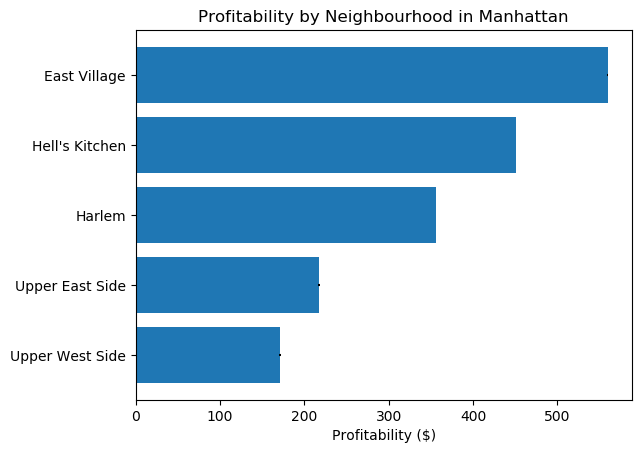

In [16]:
# Creating profitability graph

y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))

ax.barh(y_pos, x_axis, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Manhattan')

plt.show()


In [17]:
bronx_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']

manhattan_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']

queens_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']

brooklyn_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn']

staten_island_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island']

In [18]:
bronx_sample_crime_df = bronx_crime_df.sample(n=100, replace=True)
manhattan_sample_crime_df = manhattan_crime_df.sample(n=100, replace=True)
queens_sample_crime_df = queens_crime_df.sample(n=100, replace=True)
brooklyn_sample_crime_df = brooklyn_crime_df.sample(n=100, replace=True)
staten_island_sample_crime_df = staten_island_crime_df.sample(n=100, replace=True)


bronx_sample_crime_df = bronx_sample_crime_df.reset_index(drop=True)
manhattan_sample_crime_df = manhattan_sample_crime_df.reset_index(drop=True)
queens_sample_crime_df = queens_sample_crime_df.reset_index(drop=True)
brooklyn_sample_crime_df = brooklyn_sample_crime_df.reset_index(drop=True)
staten_island_sample_crime_df = staten_island_sample_crime_df.reset_index(drop=True)

In [19]:
crime_df_sample_list = [bronx_sample_crime_df, manhattan_sample_crime_df, queens_sample_crime_df, brooklyn_sample_crime_df, staten_island_sample_crime_df]

neighbourhoods = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
crime_numbers = []

for sample in crime_df_sample_list:
    for index, row in sample.iterrows():
        neighbourhood = row["neighbourhood"]
        neighbourhood_group = row["neighbourhood_group"]
        print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
        lat = row["latitude"]
        lng = row["longitude"]
        url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
        query_url = url + f"(lat_lon, {lat}, {lng}, 2000)"
    
        response = requests.get(query_url)
        data = response.json()
    
        try:
            sample.loc[index,'Number of Crimes'] = len(data)

        except:
            print(f"missing value for row number {index}")
    print(f"Total Number of Crimes in {neighbourhood_group}: {sum(sample['Number of Crimes'])}")
    crime_numbers.append(sum(sample['Number of Crimes']))
    
print(f"------------------------------------------------------------------------")
print(f"Data retrieval complete.")

Looking for crime rate in index no:0 | Soundview | Bronx
Looking for crime rate in index no:1 | Williamsbridge | Bronx
Looking for crime rate in index no:2 | Westchester Square | Bronx
Looking for crime rate in index no:3 | Concourse Village | Bronx
Looking for crime rate in index no:4 | Fordham | Bronx
Looking for crime rate in index no:5 | Fordham | Bronx
Looking for crime rate in index no:6 | Pelham Bay | Bronx
Looking for crime rate in index no:7 | Concourse | Bronx
Looking for crime rate in index no:8 | Clason Point | Bronx
Looking for crime rate in index no:9 | Wakefield | Bronx
Looking for crime rate in index no:10 | Concourse | Bronx
Looking for crime rate in index no:11 | Mott Haven | Bronx
Looking for crime rate in index no:12 | Bronxdale | Bronx
Looking for crime rate in index no:13 | Highbridge | Bronx
Looking for crime rate in index no:14 | Fordham | Bronx
Looking for crime rate in index no:15 | Belmont | Bronx
Looking for crime rate in index no:16 | Concourse Village | Br

Looking for crime rate in index no:36 | Two Bridges | Manhattan
Looking for crime rate in index no:37 | West Village | Manhattan
Looking for crime rate in index no:38 | Upper East Side | Manhattan
Looking for crime rate in index no:39 | Upper West Side | Manhattan
Looking for crime rate in index no:40 | Upper West Side | Manhattan
Looking for crime rate in index no:41 | Upper East Side | Manhattan
Looking for crime rate in index no:42 | Nolita | Manhattan
Looking for crime rate in index no:43 | East Village | Manhattan
Looking for crime rate in index no:44 | Hell's Kitchen | Manhattan
Looking for crime rate in index no:45 | East Harlem | Manhattan
Looking for crime rate in index no:46 | Upper East Side | Manhattan
Looking for crime rate in index no:47 | West Village | Manhattan
Looking for crime rate in index no:48 | East Village | Manhattan
Looking for crime rate in index no:49 | Upper West Side | Manhattan
Looking for crime rate in index no:50 | East Village | Manhattan
Looking for c

Looking for crime rate in index no:68 | Astoria | Queens
Looking for crime rate in index no:69 | Woodside | Queens
Looking for crime rate in index no:70 | Forest Hills | Queens
Looking for crime rate in index no:71 | Astoria | Queens
Looking for crime rate in index no:72 | Elmhurst | Queens
Looking for crime rate in index no:73 | Woodhaven | Queens
Looking for crime rate in index no:74 | Long Island City | Queens
Looking for crime rate in index no:75 | Astoria | Queens
Looking for crime rate in index no:76 | Woodside | Queens
Looking for crime rate in index no:77 | Jamaica | Queens
Looking for crime rate in index no:78 | Astoria | Queens
Looking for crime rate in index no:79 | Kew Gardens Hills | Queens
Looking for crime rate in index no:80 | Jamaica | Queens
Looking for crime rate in index no:81 | Ditmars Steinway | Queens
Looking for crime rate in index no:82 | Elmhurst | Queens
Looking for crime rate in index no:83 | Long Island City | Queens
Looking for crime rate in index no:84 | 

Looking for crime rate in index no:98 | Park Slope | Brooklyn
Looking for crime rate in index no:99 | Crown Heights | Brooklyn
Total Number of Crimes in Brooklyn: 1.0
Looking for crime rate in index no:0 | Arrochar | Staten Island
Looking for crime rate in index no:1 | Clifton | Staten Island
Looking for crime rate in index no:2 | Prince's Bay | Staten Island
Looking for crime rate in index no:3 | Grymes Hill | Staten Island
Looking for crime rate in index no:4 | Eltingville | Staten Island
Looking for crime rate in index no:5 | Arrochar | Staten Island
Looking for crime rate in index no:6 | Rosebank | Staten Island
Looking for crime rate in index no:7 | Westerleigh | Staten Island
Looking for crime rate in index no:8 | South Beach | Staten Island
Looking for crime rate in index no:9 | Shore Acres | Staten Island
Looking for crime rate in index no:10 | Castleton Corners | Staten Island
Looking for crime rate in index no:11 | Concord | Staten Island
Looking for crime rate in index no:12

In [29]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [30]:
crime_df = pd.DataFrame({'Neighbourhood': neighbourhoods,
                         'Total Crime Number': crime_numbers
                        })

crime_df = crime_df.sort_values(by='Total Crime Number', ascending=False)

crime_df

,Neighbourhood,Total Crime Number
1,Manhattan,364.0
0,Bronx,10.0
2,Queens,5.0
3,Brooklyn,1.0
4,Staten Island,0.0


In [34]:
bronx_popularity = len(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx'])

manhattan_popularity = len(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan'])

queens_popularity = len(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens'])

brooklyn_popularity = len(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn'])

staten_island_popularity = len(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island'])



In [37]:
popularity_list = [bronx_popularity, manhattan_popularity, queens_popularity, brooklyn_popularity, staten_island_popularity]
popularity_neighbourhood_list = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
popularity_list

[1091, 21661, 5666, 20104, 373]

In [41]:
popularity_list_df = pd.DataFrame({'Neighbourhood': popularity_neighbourhood_list,
                                   'Listing Count': popularity_list
    
})

popularity_list_df.sort_values(by='Listing Count', ascending=False)

,Neighbourhood,Listing Count
1,Manhattan,21661
3,Brooklyn,20104
2,Queens,5666
0,Bronx,1091
4,Staten Island,373


In [44]:
bronx_worth = sum(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx', 'min_price_to_stay'])

manhattan_worth = sum(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan', 'min_price_to_stay'])

queens_worth = sum(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens', 'min_price_to_stay'])

brooklyn_worth = sum(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn', 'min_price_to_stay'])

staten_island_worth = sum(airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island', 'min_price_to_stay'])



In [47]:
worth_list = [bronx_worth, manhattan_worth, queens_worth, brooklyn_worth, staten_island_worth]
worth_neighbourhood_list = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
worth_list

[378404, 40941029, 5061550, 16222407, 198950]

In [57]:
worth_list_df = pd.DataFrame({'Neighbourhood': worth_neighbourhood_list,
                                   'Total Worth of Listings': worth_list
    
})

worth_list_df = worth_list_df.sort_values(by='Total Worth of Listings', ascending=False)



worth_list_df['Total Worth of Listings'] = worth_list_df['Total Worth of Listings'].astype(float).map("${:,.0f}".format)

worth_list_df

,Neighbourhood,Total Worth of Listings
1,Manhattan,"$40,941,029"
3,Brooklyn,"$16,222,407"
2,Queens,"$5,061,550"
0,Bronx,"$378,404"
4,Staten Island,"$198,950"
